In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv(r'/content/car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
data.shape

(301, 9)

In [ ]:
data['Car_Name'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 301 entries, 0 to 300
Series name: Car_Name
Non-Null Count  Dtype 
--------------  ----- 
301 non-null    object
dtypes: object(1)
memory usage: 2.5+ KB


In [ ]:
data['Selling_type'].nunique()

2

In [ ]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [ ]:
data['Transmission'].nunique()

2

In [ ]:
data.select_dtypes(include=object)

,Car_Name,Fuel_Type,Selling_type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual
...,...,...,...,...
296,city,Diesel,Dealer,Manual
297,brio,Petrol,Dealer,Manual
298,city,Petrol,Dealer,Manual
299,city,Diesel,Dealer,Manual


In [ ]:
data['Fuel_Type'].nunique()

3

In [ ]:
data.groupby('Fuel_Type').count()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Selling_type,Transmission,Owner
Fuel_Type,,,,,,,,
CNG,2,2,2,2,2,2,2,2
Diesel,60,60,60,60,60,60,60,60
Petrol,239,239,239,239,239,239,239,239


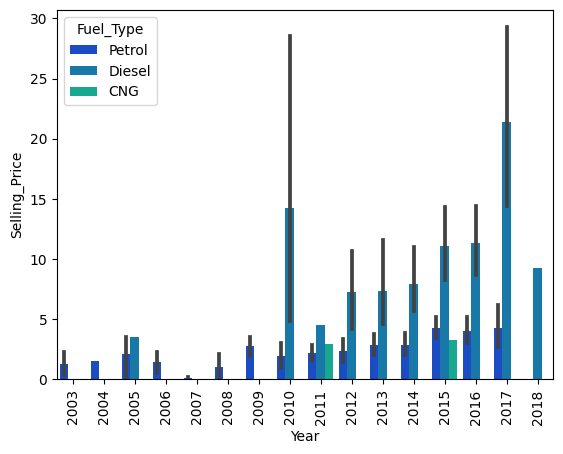

In [ ]:
sns.barplot(x=data['Year'], y=data['Selling_Price'], hue= data['Fuel_Type'], palette='winter')
plt.xticks(rotation=90)
plt.show()

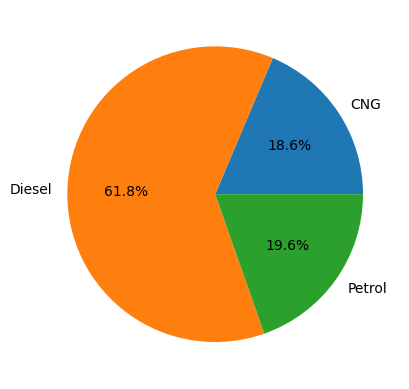

In [ ]:
from ipywidgets.widgets.widget_string import Label
df=data.groupby(['Fuel_Type'])['Selling_Price'].mean().reset_index()
plt.pie(df['Selling_Price'],labels =df['Fuel_Type'], autopct='%1.1f%%')
plt.show()

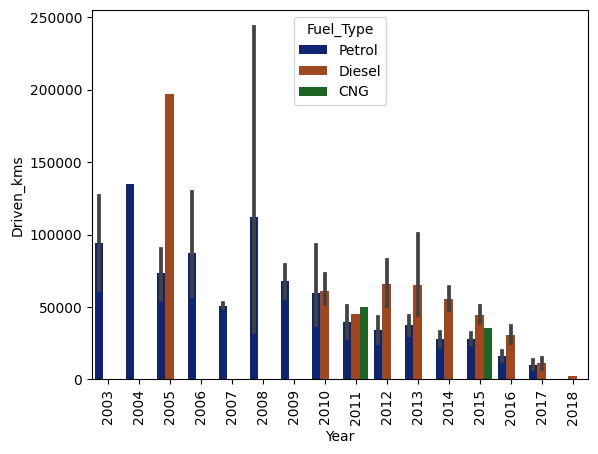

In [ ]:
sns.barplot(x=data['Year'], y=data['Driven_kms'], hue= data['Fuel_Type'], palette='dark')
plt.xticks(rotation=90)
plt.show()

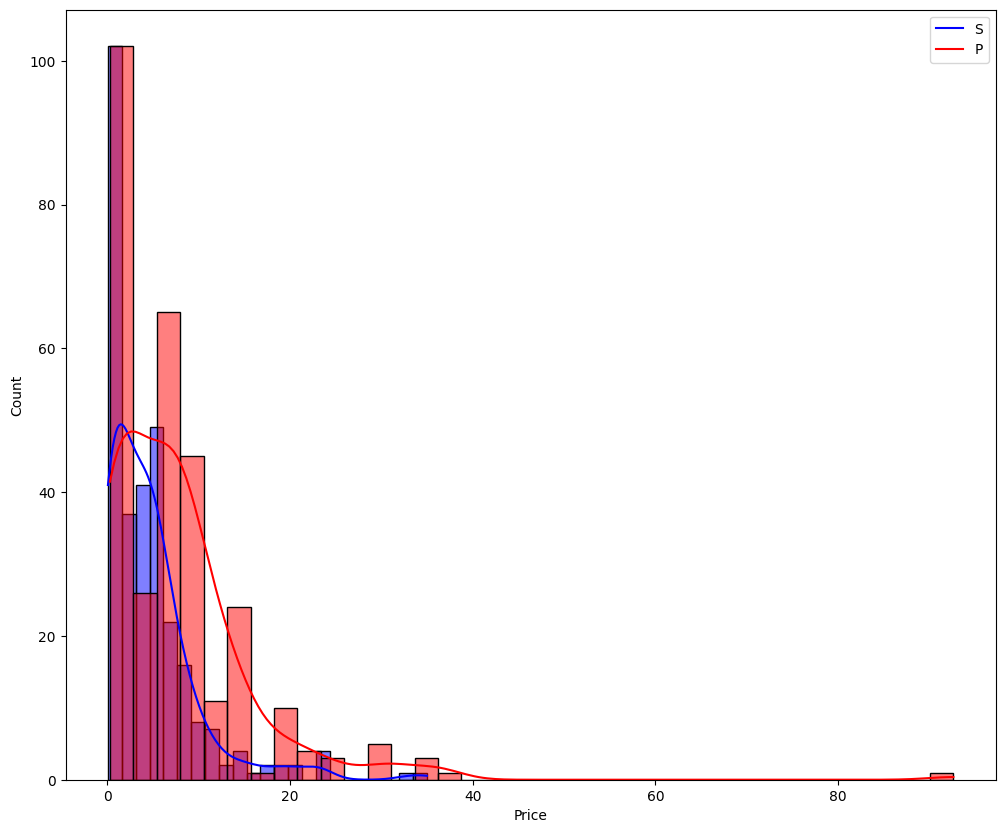

In [ ]:
plt.figure(figsize=(12,10))
sns.histplot(data['Selling_Price'], kde= True, color='blue')
sns.histplot(data['Present_Price'], kde= True, color='red')
plt.legend('SP')
plt.xlabel('Price')
plt.xticks(rotation=0)
plt.show()

Training the Model.
Scaling the prices of the cars and plotting them.

In [ ]:
from sklearn import preprocessing as ppc

In [ ]:
num_col= ['Year','Selling_Price', 'Present_Price', 'Driven_kms']
data1= data[num_col]

In [ ]:
df= data1.values
scaler= ppc.MinMaxScaler()
x_scaler= scaler.fit_transform(df)
data1= pd.DataFrame(x_scaler)
data1.columns= ['Year','Selling_Price', 'Present_Price','Driven_kms']
data1

,Year,Selling_Price,Present_Price,Driven_kms
0,0.733333,0.093123,0.057109,0.053053
1,0.666667,0.133238,0.099913,0.085085
2,0.933333,0.204871,0.103273,0.012813
3,0.533333,0.078797,0.041504,0.009409
4,0.733333,0.128940,0.070980,0.083984
...,...,...,...,...
296,0.866667,0.269341,0.122237,0.067043
297,0.800000,0.111748,0.060468,0.119119
298,0.400000,0.093123,0.115735,0.175043
299,0.933333,0.326648,0.131990,0.017017


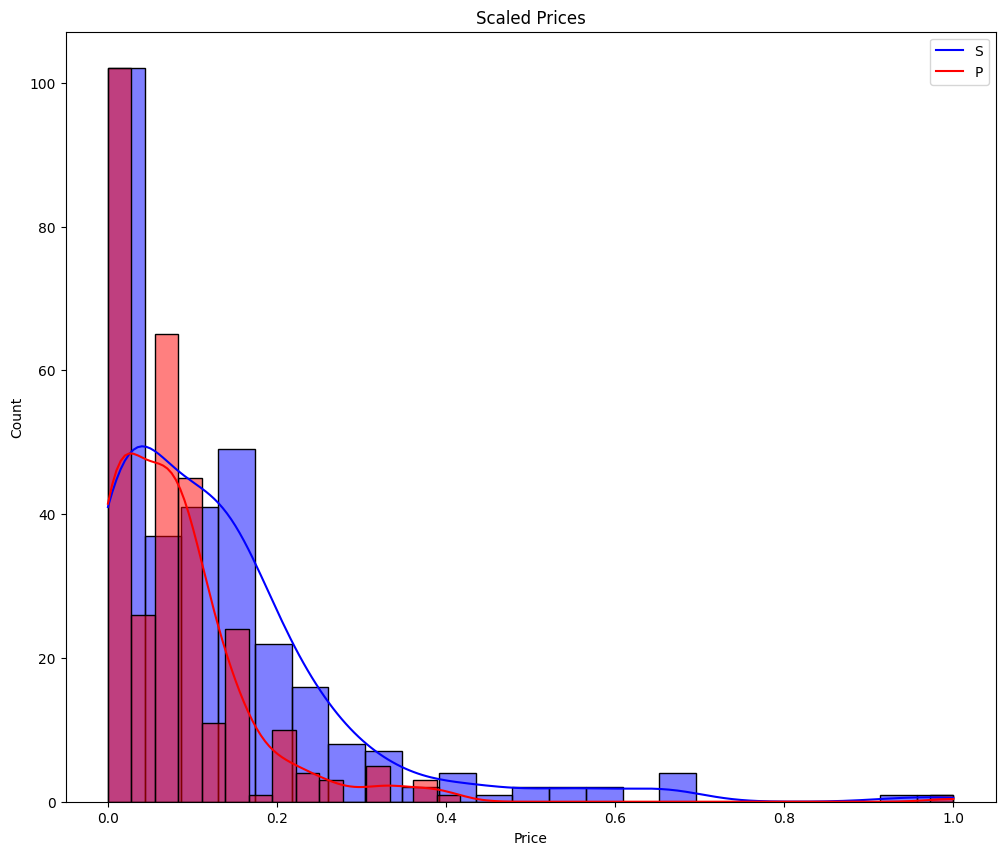

In [ ]:
df=data1.groupby(['Selling_Price'])['Year'].mean().reset_index()
plt.figure(figsize=(12,10))
sns.histplot(data1['Selling_Price'], kde= True, color='blue')
sns.histplot(data1['Present_Price'], kde= True, color='red')
plt.legend('SP')
plt.xlabel('Price')
plt.title('Scaled Prices')
plt.xticks(rotation=0)
plt.show()